## Import libraries and data

In [4]:
import pandas as pd
import numpy as np
import wget

In [7]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = wget.download(data_url)

In [12]:
df = pd.read_csv('housing.csv')

## Prepare the data according to statement

In [21]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df.drop(['ocean_proximity'], axis='columns', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## Q1

In [17]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Q2

In [23]:
df['population'].median()

1195.0

In [24]:
df['population'].mean()

1466.3172053292535

## Q3

In [40]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [41]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [102]:
X_train_zeros = df_train.fillna(0).values
X_val_zeros = df_val.fillna(0).values
w0, w = train_linear_regression(X_train_zeros, y_train)
y_pred_zeros = w0 + X_val_zeros.dot(w)

(9413, 9413)

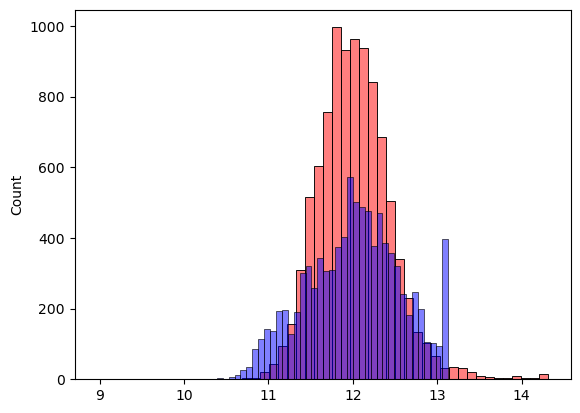

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(y_pred_zeros, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
len(y_train), len(y_pred_zeros)

In [103]:
mean_total_bedrooms = df_train.total_bedrooms.mean()
X_train_mean = df_train.fillna(mean_total_bedrooms).values
X_val_mean = df_val.fillna(mean_total_bedrooms).values
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0 + X_val_mean.dot(w)

<AxesSubplot:ylabel='Count'>

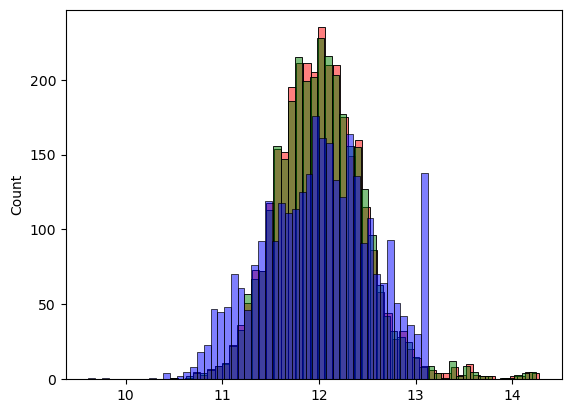

In [105]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_pred_zeros, color='green', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

In [106]:
len(y_val), len(y_pred_mean), len(y_pred_zeros)

(3137, 3137, 3137)

In [58]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [59]:
y_pred_mean

array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
       11.93466055, 12.11281089])

In [60]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [108]:
round(rmse(y_val, y_pred_mean),2), round(rmse(y_val, y_pred_zeros),2)

(0.34, 0.34)

## Q4

In [66]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
round(rmse(y_train, y_pred_mean),2)

In [109]:
regs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for reg in regs:
    X_train_zeros = df_train.fillna(0).values
    X_val_zeros = df_val.fillna(0).values
    w0, w = train_linear_regression_reg(X_train_zeros, y_train, r=reg)
    y_pred_zeros = w0 + X_val_zeros.dot(w)
    print("Regulization with " + str(reg) + " yields RSME: " + str(round(rmse(y_val, y_pred_zeros),3)))

Regulization with 0 yields RSME: 0.341
Regulization with 1e-06 yields RSME: 0.341
Regulization with 0.0001 yields RSME: 0.341
Regulization with 0.001 yields RSME: 0.341
Regulization with 0.01 yields RSME: 0.341
Regulization with 0.1 yields RSME: 0.341
Regulization with 1 yields RSME: 0.345
Regulization with 5 yields RSME: 0.348
Regulization with 10 yields RSME: 0.348


## Q5

In [116]:
def compute_rmse_from_seed(df, seed):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train_zeros = df_train.fillna(0).values
    X_val_zeros = df_val.fillna(0).values
    w0, w = train_linear_regression(X_train_zeros, y_train)
    y_pred_zeros = w0 + X_val_zeros.dot(w)
    return rmse(y_val, y_pred_zeros)

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = []
for seed in seeds:
    rmse_scores.append(compute_rmse_from_seed(df, seed))

In [118]:
std = np.std(rmse_scores)
round(std, 3)

0.005

## Q6

In [119]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [132]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = df_full_train.fillna(0).values
y_full_train = np.concatenate([y_train, y_val])
X_test = df_test.fillna(0).values

y_pred = w0 + X_test.dot(w)
round(rmse(y_test, y_pred),2)

0.33